# Red Wine Machine Learning Model

In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
from collections import Counter

In [2]:
path = 'Resources/RedWine_dataset.csv'
red_wine_df1 = pd.read_csv(path)
red_wine_df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [3]:
red_wine_df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.875547,46.468418,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460434,32.895920,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
red_wine_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   int64  
 6   total sulfur dioxide  1599 non-null   int64  
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 150.0 KB


In [5]:
# Check for null values
red_wine_df1.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# Sort quality values
red_wine_df1['quality'].value_counts().sort_values() 

3     10
8     18
4     53
7    199
6    638
5    681
Name: quality, dtype: int64

In [7]:
# Check value counts
for col in red_wine_df1:
    print(red_wine_df1[col].value_counts(ascending=False), '\n')

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64 

0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64 

0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64 

2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64 

0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64 

6     139
5     104
10     79
15     78
12     75
7      71
9      62
16     61
17     60
11     59


In [8]:
# Show rows and columns of original dataset
red_wine_df1.shape

(1599, 12)

In [9]:
# Drop Duplicates
# Show rows and columns of updated dataset
red_wine=red_wine_df1.copy()
red_wine.drop_duplicates(subset=None,inplace=True)
red_wine.shape

(1359, 12)

In [10]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   int64  
 6   total sulfur dioxide  1359 non-null   int64  
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 138.0 KB


###### No categorical variables found in dataset // All variables are qualitative

## Data Visualizations

### Correlation Heatmap

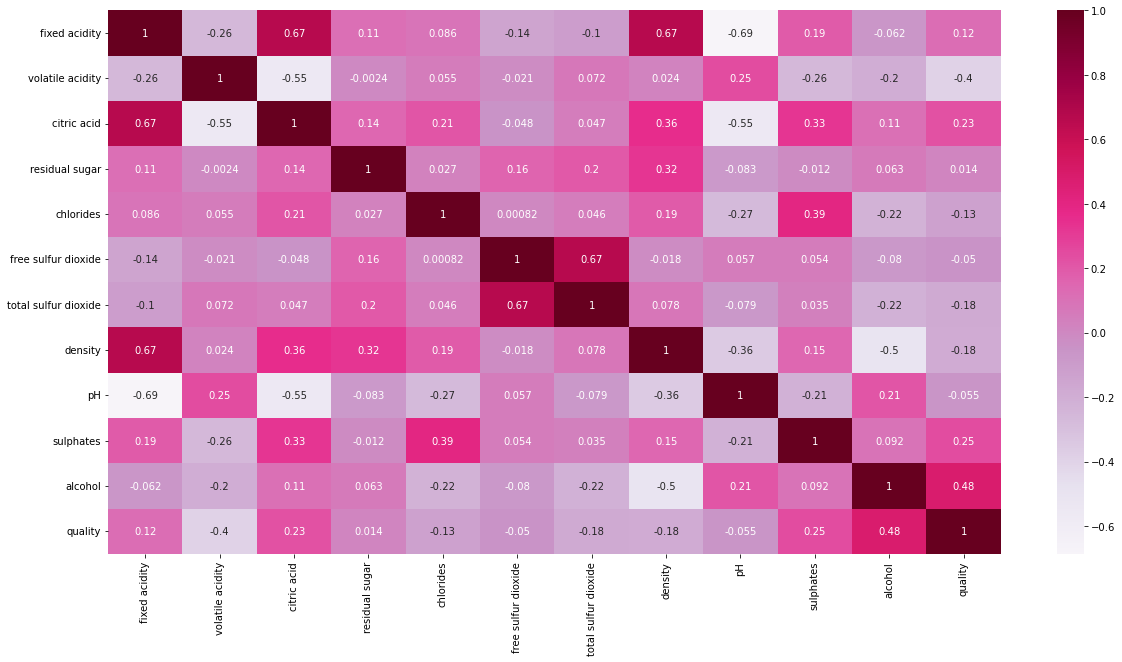

In [11]:
plt.figure(figsize=(20, 10))
sns.heatmap(red_wine.corr(), annot=True,cmap='PuRd')
plt.show()

### Pairplot

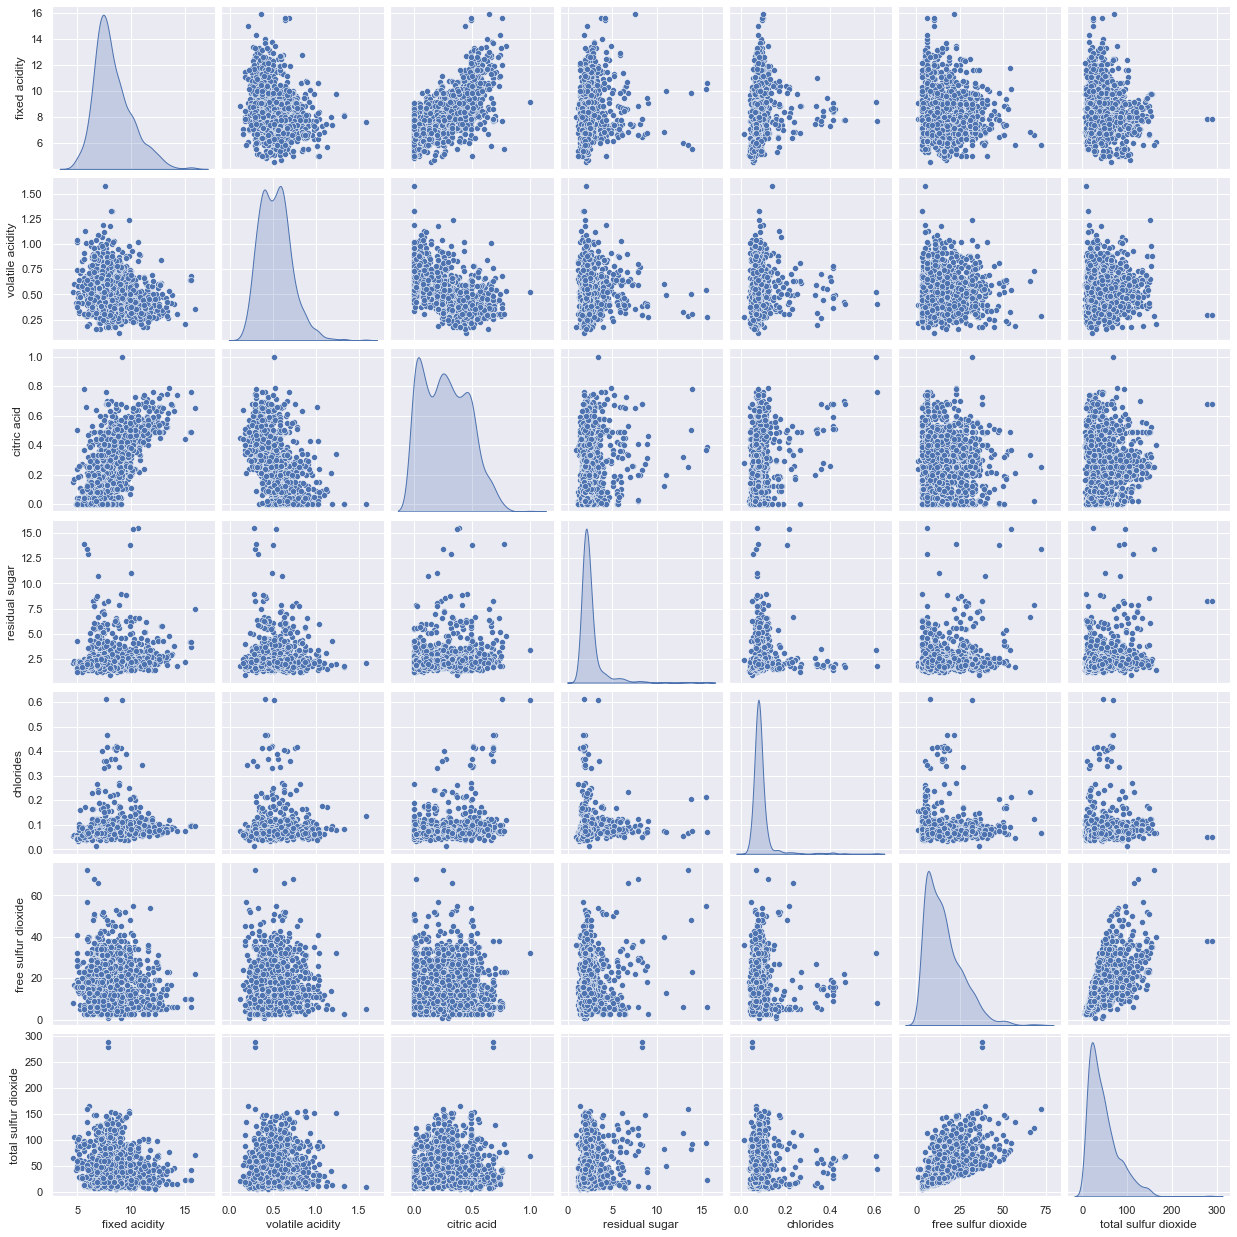

In [12]:
# Multi-Variate Analysis
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = red_wine.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')

### Bar Chart

No handles with labels found to put in legend.


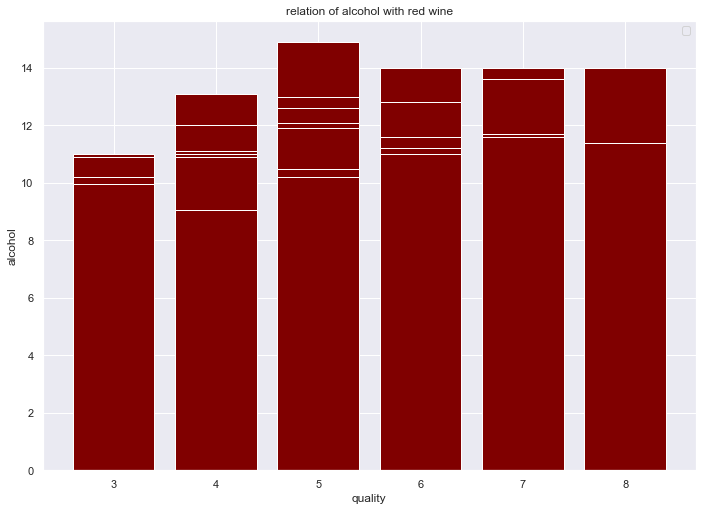

In [13]:
# checking the variation of alcohol in the different qualities of wine

plt.bar(red_wine['quality'], red_wine['alcohol'], color = 'maroon')
plt.title('relation of alcohol with red wine')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.legend()
plt.show()

After an analysis, we can see that there is a high and strong correlation between alcohol and quality. We can also see that there there is a very weak correlation between residual sugar and free sulfur dioxide, so we can ignore those features when creating our model.

## Split the Data into Training and Testing

In [14]:
#dropping columns
red_wine.drop(['fixed acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH'], axis = 1, inplace = True)
red_wine

,volatile acidity,citric acid,sulphates,alcohol,quality
0,0.700,0.00,0.56,9.4,5
1,0.880,0.00,0.68,9.8,5
2,0.760,0.04,0.65,9.8,5
3,0.280,0.56,0.58,9.8,6
5,0.660,0.00,0.56,9.4,5
...,...,...,...,...,...
1593,0.620,0.08,0.82,9.5,6
1594,0.600,0.08,0.58,10.5,5
1595,0.550,0.10,0.76,11.2,6
1597,0.645,0.12,0.71,10.2,5


In [15]:
# Dividing the dataset in training and testing set
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 

np.random.seed(0)
df_train,df_test=train_test_split(red_wine,train_size=0.7,test_size=0.3,random_state=100)

In [16]:
# Create our features
#X = red_wine[list(red_wine.columns)[:-1]]

# Create our target
#y = red_wine['quality']

X = red_wine.filter(items=['alcohol', 'volatile acidity' ,'sulphates', 'citric acid'])
y = red_wine['quality']

In [17]:
X.describe()

,alcohol,volatile acidity,sulphates,citric acid
count,1359.000000,1359.000000,1359.000000,1359.000000
mean,10.432315,0.529478,0.658705,0.272333
std,1.082065,0.183031,0.170667,0.195537
min,8.400000,0.120000,0.330000,0.000000
25%,9.500000,0.390000,0.550000,0.090000
50%,10.200000,0.520000,0.620000,0.260000
75%,11.100000,0.640000,0.730000,0.430000
max,14.900000,1.580000,2.000000,1.000000


In [18]:
y.describe()

count    1359.000000
mean        5.623252
std         0.823578
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [19]:
y.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, stratify=y)

In [21]:
# Training model info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 31 to 926
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   volatile acidity  951 non-null    float64
 1   citric acid       951 non-null    float64
 2   sulphates         951 non-null    float64
 3   alcohol           951 non-null    float64
 4   quality           951 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 44.6 KB


In [22]:
# Testing model info
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408 entries, 1573 to 677
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   volatile acidity  408 non-null    float64
 1   citric acid       408 non-null    float64
 2   sulphates         408 non-null    float64
 3   alcohol           408 non-null    float64
 4   quality           408 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 19.1 KB


In [23]:
df_train.shape

(951, 5)

In [24]:
df_test.shape

(408, 5)

## Rescaling

!pip install imblearn --upgrade pip

In [25]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [26]:
from imblearn.over_sampling import SMOTE
#oversampling on minority
smote = SMOTE()
X, y = smote.fit_resample(X_train, y_train)

## Linear Regression

In [27]:
# fitting linear regression to training data
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [28]:
train_pred = regressor.predict(X_train)
print(train_pred)
test_pred = regressor.predict(X_test) 
print(test_pred)

[5.15179735 5.41358248 4.83672289 ... 5.63825393 5.04051178 6.119065  ]
[5.65104264 5.06109491 4.76293844 6.03828098 5.43517573 6.09195995
 5.33939937 5.72103239 5.78632346 6.19406103 5.51389984 6.27695426
 5.34059643 5.96495164 5.68599912 6.38170747 6.21214601 5.44433379
 4.91499296 6.27416522 5.61480495 4.85900478 6.26194139 6.17631596
 5.28506291 5.00440973 5.37885036 6.27420118 5.55924683 5.47688853
 6.17355344 7.03137473 5.15355093 6.41414672 5.29893057 5.0709869
 5.60848041 5.54934521 5.91921144 6.40171156 6.34664224 5.39171197
 5.29786053 5.24974563 5.20261473 5.41727997 5.52981161 6.69824135
 5.02272449 6.19557321 6.20457021 5.24291904 5.02973821 6.59334651
 5.8266717  5.3861063  5.92596396 6.24206188 6.36229115 5.12175337
 5.17233171 5.86649466 5.62044422 5.15080074 6.32493604 5.35944413
 5.58318462 5.69699602 6.35681459 5.39350705 6.0922383  5.69126307
 5.87395932 5.89433963 5.72156859 5.59436928 5.38178901 5.80357917
 5.7804525  5.06741801 5.69453782 5.37768925 5.59695621 5.

In [29]:
# calculating Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error

train_rmse = mean_squared_error(train_pred, y_train) ** 0.5
print(train_rmse)
test_rmse = mean_squared_error(test_pred, y_test) ** 0.5
print(test_rmse)

0.6736132069200018
0.6488703671916015


In [30]:
# rounding off the predicted values for test set
predicted_data = np.round_(test_pred)
print(predicted_data)

[6. 5. 5. 6. 5. 6. 5. 6. 6. 6. 6. 6. 5. 6. 6. 6. 6. 5. 5. 6. 6. 5. 6. 6.
 5. 5. 5. 6. 6. 5. 6. 7. 5. 6. 5. 5. 6. 6. 6. 6. 6. 5. 5. 5. 5. 5. 6. 7.
 5. 6. 6. 5. 5. 7. 6. 5. 6. 6. 6. 5. 5. 6. 6. 5. 6. 5. 6. 6. 6. 5. 6. 6.
 6. 6. 6. 6. 5. 6. 6. 5. 6. 5. 6. 5. 5. 5. 5. 6. 5. 5. 5. 6. 6. 5. 7. 6.
 6. 6. 5. 6. 5. 5. 6. 6. 6. 6. 6. 6. 5. 6. 5. 7. 6. 6. 6. 5. 5. 5. 5. 6.
 6. 5. 6. 5. 6. 5. 6. 6. 5. 5. 5. 6. 6. 6. 6. 5. 6. 6. 5. 6. 5. 5. 5. 6.
 5. 6. 5. 6. 5. 5. 6. 6. 6. 6. 6. 5. 6. 6. 5. 5. 6. 5. 5. 5. 5. 5. 5. 5.
 6. 5. 5. 6. 5. 6. 6. 5. 5. 6. 5. 5. 5. 6. 6. 5. 6. 5. 7. 5. 6. 5. 5. 5.
 6. 4. 5. 6. 5. 6. 6. 6. 5. 7. 5. 5. 6. 6. 6. 6. 5. 5. 5. 6. 5. 6. 6. 5.
 5. 5. 6. 6. 7. 5. 6. 5. 6. 6. 6. 6. 6. 6. 6. 5. 5. 6. 5. 6. 5. 6. 5. 5.
 5. 5. 5. 5. 6. 5. 6. 5. 6. 6. 5. 5. 5. 6. 7. 6. 6. 6. 7. 5. 6. 5. 6. 5.
 5. 6. 6. 5. 6. 7. 5. 6. 5. 5. 7. 6. 6. 5. 5. 6. 5. 6. 6. 6. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 6. 6. 5. 5. 6. 5. 5. 5. 6. 6. 6. 6. 6. 5. 7. 6. 6. 6. 6.
 6. 6. 5. 6. 6. 6. 6. 6. 5. 5. 7. 5. 6. 5. 5. 5. 5.

In [31]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

Mean Absolute Error: 0.5077154138379273
Mean Squared Error: 0.42103275341936375
Root Mean Squared Error: 0.6488703671916015


### Balanced Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, stratify=y)

In [33]:
X = red_wine.filter(items=['alcohol', 'sulphates', 'total sulfur dioxide'])
y = red_wine['quality']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [34]:
y_pred = clf.predict(X_test)

In [35]:
print('Training Accuracy of Random Forest: ', clf.score(X_train, y_train))
print('Test Accuracy of Random Forest: ', clf.score(X_test, y_test))

Training Accuracy of Random Forest:  0.8638454461821528
Test Accuracy of Random Forest:  0.47794117647058826


In [36]:
print('Accuracy: ', metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.47794117647058826


### Decision Tree

In [37]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, stratify=y)

In [38]:
X = red_wine.filter(items=['alcohol', 'sulphates', 'total sulfur dioxide'])
y = red_wine['quality']

In [39]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.06      0.08      0.06        13
           5       0.59      0.70      0.64       144
           6       0.50      0.37      0.43       134
           7       0.30      0.31      0.30        42
           8       0.00      0.00      0.00         4

    accuracy                           0.49       340
   macro avg       0.24      0.24      0.24       340
weighted avg       0.49      0.49      0.48       340



In [44]:
import pickle

# save the model to disk
filename = 'model.pkl'
pickle.dump(model1, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.4852941176470588
